In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [2]:
# Generate curved data: moons
X, y = make_moons(n_samples=200, noise=0.1, random_state=42)

In [3]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
# Train SVM with polynomial kernel (degree=3 for cubic curve)
model = SVC(kernel='poly', degree=3, gamma='scale', coef0=1, C=1.0)  # Poly kernel for curved boundaries
model.fit(X_scaled, y)

SVC(coef0=1, kernel='poly')

In [6]:
# Function to plot decision boundary
def plot_svm(model, X, y, title):
    plt.figure(figsize=(8, 6))
    # Create grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    # Predict
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot regions
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    # Data points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    # Support vectors
    plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
                s=100, facecolors='none', edgecolors='black', linewidth=1.5, label='Support Vectors')
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.show()

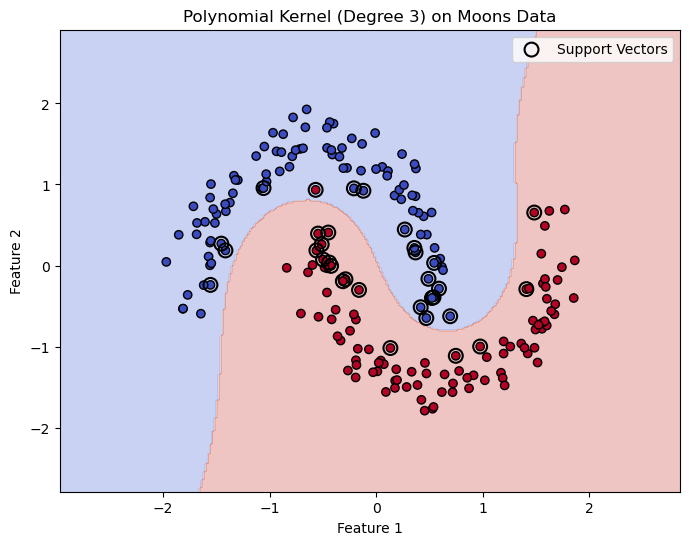

In [7]:
# Plot
plot_svm(model, X_scaled, y, "Polynomial Kernel (Degree 3) on Moons Data")

# Big Dots Represents the Support Vectors